Two students are pursuing degrees in Pharmacology/Biomedical Sciences — one at San Diego State University (SDSU) and one at University of Colorado Boulder (CU Boulder). They both want to estimate their expected net financial position at age 45, based on uncertain costs and earnings throughout their studies and early careers.  Which pathway — SDSU or CU Boulder — offers the higher expected net financial position at age 45?

Variable	Description	Possible Values (in $)	Probabilities

𝑇 -	Annual tuition cost

𝑆 -	Annual scholarship amount
Assumes students apply to only one scholarship type or none at all
$0 (p=0.6), $6,000 (p=0.25), $12,000 (p=0.15)

𝑌 -	Starting annual salary after graduation	
Assumes no employment during college

𝐻 -	Annual housing and living cost
Assumptions - Dorm all 4 years

Expected Net Financial Position at Age 45:
SDSU: $1,165,744
CU Boulder: $1,102,920


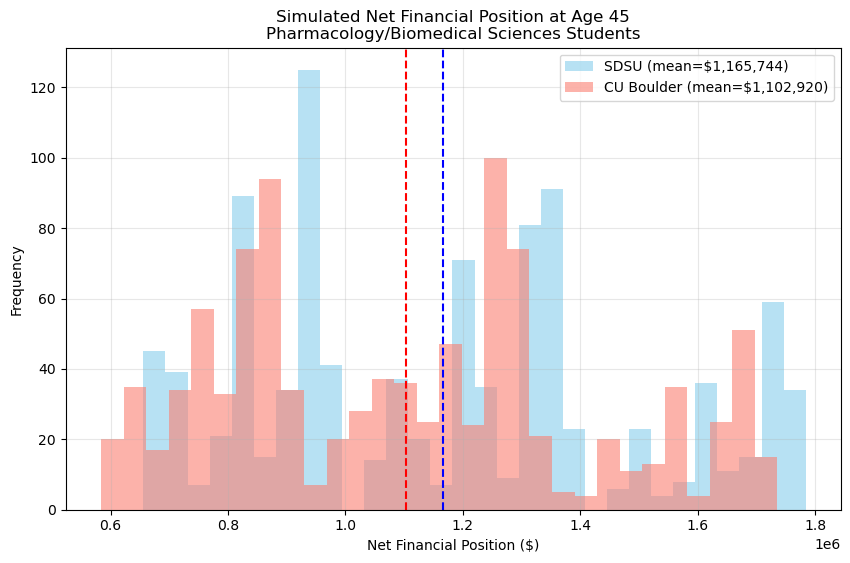

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 1000  # number of simulations

def simulate_university(university, N=1000):
    # Tuition (T)
    if university == "SDSU":
        tuition = np.random.choice([12000, 20000], size=N, p=[0.7, 0.3])
        dorm = np.random.choice([14000, 16000], size=N, p=[0.6, 0.4])
    elif university == "CU Boulder":
        tuition = np.random.choice([20000, 32000], size=N, p=[0.6, 0.4])
        dorm = np.random.choice([18000, 22000], size=N, p=[0.5, 0.5])
    else:
        raise ValueError("Invalid university name")

    # Scholarship (S) — one type or none
    scholarship = np.random.choice([0, 6000, 12000], size=N, p=[0.6, 0.25, 0.15])

    # Salary (Y)
    salary = np.random.choice([70000, 90000, 110000], size=N, p=[0.4, 0.4, 0.2])

    # Post-graduation living cost
    living_cost = np.random.choice([18000, 24000, 30000], size=N, p=[0.5, 0.3, 0.2])

    # Net financial position: 4 college years + 20 work years
    W = 4 * (scholarship - tuition - dorm) + 20 * (salary - living_cost)
    return W

# Run simulations
W_SDSU = simulate_university("SDSU", N)
W_CU = simulate_university("CU Boulder", N)

# Compute expected values
E_SDSU = np.mean(W_SDSU)
E_CU = np.mean(W_CU)

# Display results
print("Expected Net Financial Position at Age 45:")
print(f"SDSU: ${E_SDSU:,.0f}")
print(f"CU Boulder: ${E_CU:,.0f}")

# Visualization
plt.figure(figsize=(10,6))
plt.hist(W_SDSU, bins=30, alpha=0.6, label=f"SDSU (mean=${E_SDSU:,.0f})", color='skyblue')
plt.hist(W_CU, bins=30, alpha=0.6, label=f"CU Boulder (mean=${E_CU:,.0f})", color='salmon')
plt.axvline(E_SDSU, color='blue', linestyle='--')
plt.axvline(E_CU, color='red', linestyle='--')
plt.title("Simulated Net Financial Position at Age 45\nPharmacology/Biomedical Sciences Students")
plt.xlabel("Net Financial Position ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
